In [4]:
import pandas as pd

funcionario_df = pd.read_csv("CadastroFuncionarios.csv",sep=';',decimal=',')
cliente_df = pd.read_csv("CadastroClientes.csv",sep=';',decimal=',')
servico_df = pd.read_excel("BaseServiçosPrestados.xlsx")

#retirar colunas estado civil

funcionario_df = funcionario_df.drop(['Estado Civil','Cargo'], axis =1)

display(funcionario_df)
display(cliente_df)
display(servico_df)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


In [5]:
funcionario_df['Salario Total']= funcionario_df['Salario Base'] + funcionario_df['Impostos'] + funcionario_df['Beneficios'] + funcionario_df['VR']+ funcionario_df['VT']

print ("Total da Folha Salarial R${:,}".format(funcionario_df['Salario Total'].sum()))

Total da Folha Salarial R$2,717,493.22


In [6]:
#faturamento da empresa

faturamentos_df = servico_df[['ID Cliente','Tempo Total de Contrato (Meses)']].merge(cliente_df[['ID Cliente', 'Valor Contrato Mensal']], on='ID Cliente')
faturamentos_df['Faturamento Total']= faturamentos_df['Tempo Total de Contrato (Meses)'] *faturamentos_df['Valor Contrato Mensal']

print("Faturamento totalda Empresa R${:,}".format(faturamentos_df['Faturamento Total'].sum()))

Faturamento totalda Empresa R$5,519,160


In [7]:
#Percentual de funcionarios que fecharam contrato

qtde_funcionario_fecharam_contrato = len(servico_df["ID Funcionário"].unique())
qtde_funcionario_total = len(funcionario_df["ID Funcionário"])

print("Percentual Funcionario que Fecharam contrato: {:.2%}".format(qtde_funcionario_fecharam_contrato/qtde_funcionario_total))

Percentual Funcionario que Fecharam contrato: 86.84%


In [9]:
#qdte contrato por área

contratos_area_df=servico_df[['ID Funcionário']].merge(funcionario_df[['ID Funcionário', 'Area']], on='ID Funcionário')
contratos_area_qtde = contratos_area_df['Area'].value_counts()
print(contratos_area_qtde)


Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64


Area
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: count, dtype: int64


<Axes: xlabel='Area'>

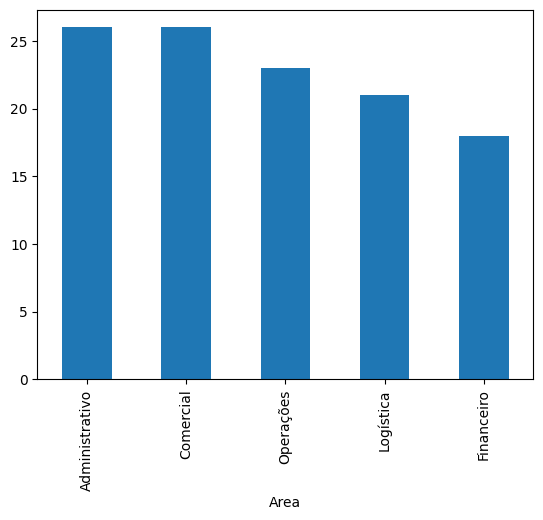

In [11]:
funcionario_area = funcionario_df['Area'].value_counts()
print(funcionario_area)
funcionario_area.plot(kind='bar')

In [15]:
#ticket médio

ticket_medio=cliente_df['Valor Contrato Mensal'].mean()
print("Ticket médio mensal:R$ {:,.2f}".format(ticket_medio))

Ticket médio mensal:R$ 2,502.56
